In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from scipy.misc import imread
import matplotlib.patches as patches
from torch.utils.data import DataLoader
from torch.optim import SGD
import cv2

In [3]:
import os
import torchvision.transforms as transforms
from faster_rcnn.utils.dataset import CocoData
dataDir = './data/mscoco'
dataType = 'train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

images_dir = os.path.join(dataDir,'images', dataType)
cap = CocoData(root = images_dir,
                        annFile = annFile,
                        transform=transforms.ToTensor())


loading annotations into memory...
Done (t=9.14s)
creating index...
index created!


[22.96, 175.07, 253.99, 357.31]
[110.66, 508.47, 192.52, 41.13]


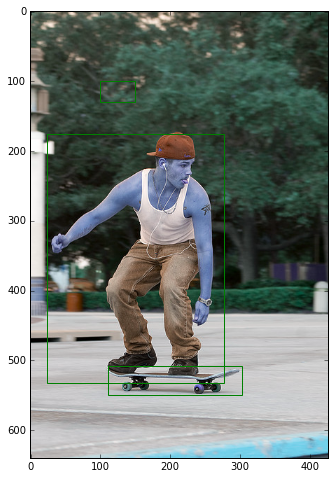

In [17]:
im_id = cap.ids[7]
cap.coco.getAnnIds(im_id)
img_info =  cap.coco.loadImgs(im_id)[0]
img_name = img_info['file_name']
annIds = cap.coco.getAnnIds(imgIds=im_id, iscrowd=None)
anns = cap.coco.loadAnns(annIds)
fig,ax = plt.subplots(1)
base_path = './data/mscoco/images/train2014/'
img_path = os.path.join(base_path, img_name)
# Display the image
im_data = cv2.imread(img_path)

ax.imshow(im_data)

# Create a Rectangle patch
for i, box_anns in enumerate(anns):
    box = box_anns['bbox']
    print box
    rect = patches.Rectangle((box[0], box[1]), box[2], box[3] ,linewidth=1,edgecolor='g',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    
rect = patches.Rectangle((100, 100), 50, 30 ,linewidth=1,edgecolor='g',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)    
    
plt.show()